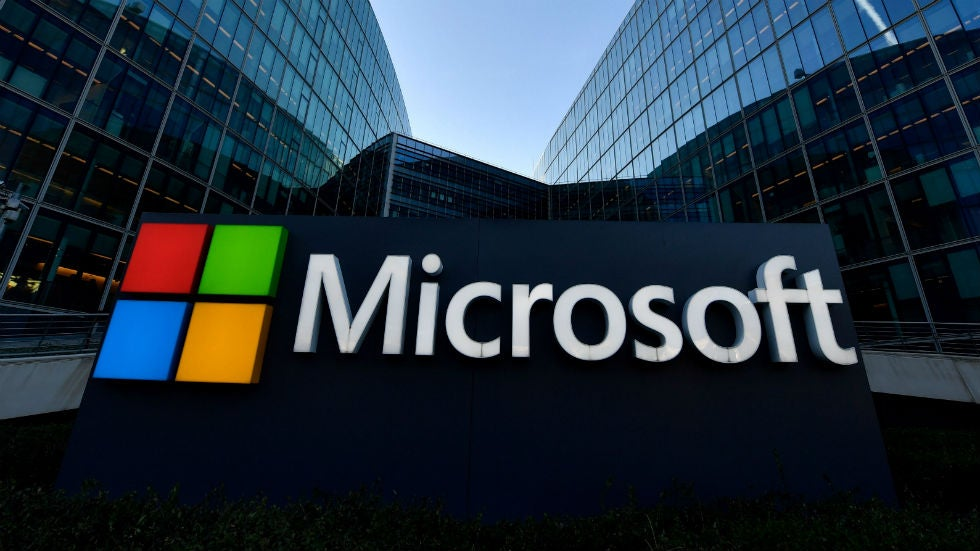

# Microsoft Movie Analysis

# Overview

Microsoft want to analyze if a production budget is indicative of a successful movie. Microsoft believes a movie's average rating, popularity, and profit are are signs of a successful movie. They hope analyzing budget's relation and effect on average rating, popularity, and profit will help decide if budget could be applied to what indicates a successful movie. 

# Bussiness Problem

Microsoft would like to look at how budget affect the average rating, popularity, and profit. Microsoft's max budget will be 100 million so we will look at data under this. Microsoft would like to know if budget has positive relationships, to better understand how it affects the success.  

# Data

Microsoft has given data on movies on past movies to analyze budget. Extracted data used on movie’s budgets under 100 million, average ratings with minimum number of votes 10,000, popularity, domestic and foreign gross.

#     Setting files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob

In [2]:
files_csv = glob('Data/*.csv.gz')
files_csv

['Data\\bom.movie_gross.csv.gz',
 'Data\\imdb.name.basics.csv.gz',
 'Data\\imdb.title.akas.csv.gz',
 'Data\\imdb.title.basics.csv.gz',
 'Data\\imdb.title.crew.csv.gz',
 'Data\\imdb.title.principals.csv.gz',
 'Data\\imdb.title.ratings.csv.gz',
 'Data\\tmdb.movies.csv.gz',
 'Data\\tn.movie_budgets.csv.gz']

In [3]:
csv_files_dict = {}
for filename in files_csv:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [4]:
for c in csv_files_dict.keys():
    csv_files_dict[c].reset_index(inplace=True)

In [5]:
csv_files_dict.keys()

dict_keys(['bom_movie_gross_gz', 'imdb_name_basics_gz', 'imdb_title_akas_gz', 'imdb_title_basics_gz', 'imdb_title_crew_gz', 'imdb_title_principals_gz', 'imdb_title_ratings_gz', 'tmdb_movies_gz', 'tn_movie_budgets_gz'])

In [6]:
for c in csv_files_dict.keys():
    print(c)
    print(csv_files_dict[c].info())

bom_movie_gross_gz
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
imdb_name_basics_gz
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_

In [7]:
for c in csv_files_dict.keys():
    csv_files_dict[c].reset_index(inplace=True)

In [8]:
#setting columns to variables
budgets = csv_files_dict['tn_movie_budgets_gz']
titles = csv_files_dict['imdb_title_basics_gz']
ratings = csv_files_dict['imdb_title_ratings_gz']
popularity= csv_files_dict['tmdb_movies_gz']

In [9]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              5782 non-null   int64 
 1   id                 5782 non-null   int64 
 2   release_date       5782 non-null   object
 3   movie              5782 non-null   object
 4   production_budget  5782 non-null   object
 5   domestic_gross     5782 non-null   object
 6   worldwide_gross    5782 non-null   object
dtypes: int64(2), object(5)
memory usage: 316.3+ KB


# Budgets to Rating

In [10]:
#merging title and ratings to be able to merge with budgets
title_ratings = pd.merge(titles, ratings, left_on='tconst', right_on = 'tconst', how= 'inner' )
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index_x          73856 non-null  int64  
 1   tconst           73856 non-null  object 
 2   primary_title    73856 non-null  object 
 3   original_title   73856 non-null  object 
 4   start_year       73856 non-null  int64  
 5   runtime_minutes  66236 non-null  float64
 6   genres           73052 non-null  object 
 7   index_y          73856 non-null  int64  
 8   averagerating    73856 non-null  float64
 9   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 6.2+ MB


In [11]:
# rid of unnecessary columns
title_ratings.drop(columns=[
    'index_x',
    'index_y',
    'original_title',
    'start_year',
    'runtime_minutes',
    'genres'
], 
              inplace=True)
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   primary_title  73856 non-null  object 
 2   averagerating  73856 non-null  float64
 3   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
#finding movies with a minimum number of votes oer 10000
title_ratings = title_ratings[title_ratings['numvotes']>=10000]
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 31 to 73388
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         2678 non-null   object 
 1   primary_title  2678 non-null   object 
 2   averagerating  2678 non-null   float64
 3   numvotes       2678 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 104.6+ KB


In [13]:
budgets['production_budget']= budgets['production_budget'].str.replace(",", "")
budgets['production_budget']= budgets['production_budget'].str.replace("$", "")

<ipython-input-13-6399c67c69dd>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  budgets['production_budget']= budgets['production_budget'].str.replace("$", "")


In [14]:
#changing production_budget to float
budgets['production_budget'] = budgets['production_budget'].astype(float)

In [15]:
budgets_lt_100mil = budgets[budgets['production_budget']<100000000]
budgets_lt_100mil

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
406,406,7,"Nov 6, 2015",The Peanuts Movie,99000000.0,"$130,178,411","$250,091,610"
407,407,8,"Feb 8, 2019",The LEGO Movie 2: The Second Part,99000000.0,"$105,806,508","$190,325,698"
408,408,9,"Nov 21, 2018",Robin Hood,99000000.0,"$30,824,628","$84,747,441"
409,409,10,"May 4, 2001",The Mummy Returns,98000000.0,"$202,007,640","$435,040,395"
410,410,11,"Dec 20, 2002",Gangs of New York,97000000.0,"$77,730,500","$183,124,621"
...,...,...,...,...,...,...,...
5777,5777,78,"Dec 31, 2018",Red 11,7000.0,$0,$0
5778,5778,79,"Apr 2, 1999",Following,6000.0,"$48,482","$240,495"
5779,5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,"$1,338","$1,338"
5780,5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,$0,$0


In [16]:
#merging title_ratings and popularity
budgets_rating= pd.merge(title_ratings, budgets_lt_100mil, left_on='primary_title', right_on = 'movie', how= 'inner' )
budgets_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 0 to 1161
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             1162 non-null   object 
 1   primary_title      1162 non-null   object 
 2   averagerating      1162 non-null   float64
 3   numvotes           1162 non-null   int64  
 4   index              1162 non-null   int64  
 5   id                 1162 non-null   int64  
 6   release_date       1162 non-null   object 
 7   movie              1162 non-null   object 
 8   production_budget  1162 non-null   float64
 9   domestic_gross     1162 non-null   object 
 10  worldwide_gross    1162 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 108.9+ KB


In [17]:
# rid of unnecessary columns
budgets_rating.drop(columns=[
    'release_date',
    'index',
    'movie',
    'domestic_gross'
], 
              inplace=True)

In [18]:
budgets_rating[['production_budget','averagerating']].describe()

,production_budget,averagerating
count,1.162000e+03,1162.000000
mean,2.754614e+07,6.426506
std,2.345391e+07,0.905445
min,5.000000e+04,1.600000
25%,9.750000e+06,5.900000
50%,2.000000e+07,6.500000
75%,4.000000e+07,7.100000
max,9.900000e+07,8.500000


In [19]:
budgets_rating[['production_budget','averagerating']].corr()

,production_budget,averagerating
production_budget,1.000000,-0.065367
averagerating,-0.065367,1.000000


In [20]:
br_sort = budgets_rating[['production_budget','averagerating']].sort_values(by='production_budget', ascending=False)[:100]
br_sort

,production_budget,averagerating
809,99000000.0,7.1
80,99000000.0,6.6
81,99000000.0,5.3
757,97000000.0,6.4
49,95000000.0,5.9
...,...,...
841,68000000.0,6.3
25,68000000.0,5.9
254,68000000.0,5.0
281,68000000.0,5.7


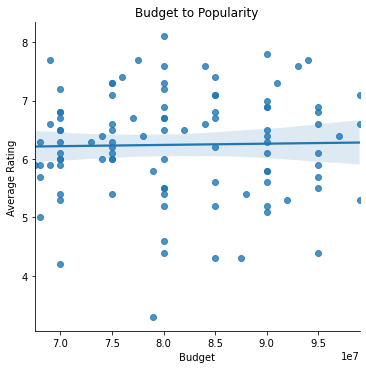

In [21]:
#scatter plot of the top 100
sns.lmplot(x='production_budget', y='averagerating', data=br_sort[:100]);
plt.title('Budget to Popularity')
plt.xlabel("Budget")
plt.ylabel("Average Rating");

There appears to be no relation between the top 100 production budgets under 100 million and average ratings with a number of votes at least 10,000.

In [22]:
br_sort.describe()

,production_budget,averagerating
count,1.000000e+02,100.00000
mean,8.123500e+07,6.24500
std,9.133813e+06,0.90792
min,6.750000e+07,3.30000
25%,7.475000e+07,5.70000
50%,8.000000e+07,6.30000
75%,9.000000e+07,6.82500
max,9.900000e+07,8.10000


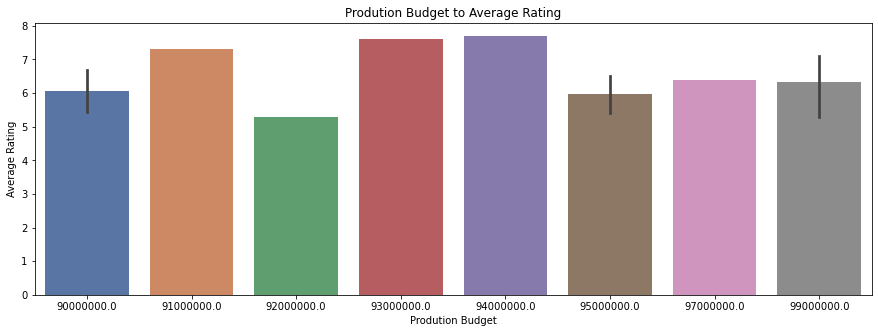

In [23]:
#a plot
plt.figure(figsize=(15,5))
plt.title("Prodution Budget to Average Rating")
sns.barplot(palette="deep", x=br_sort['production_budget'][:20], y=br_sort['averagerating']);
plt.xlabel("Prodution Budget")
plt.ylabel("Average Rating");

Looking at the top 20, as expected from the correlation above, production budget appears to have no effect on a movies average rating. 

# Budget to Popularity

In [24]:
popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   level_0            26517 non-null  int64  
 1   index              26517 non-null  int64  
 2   genre_ids          26517 non-null  object 
 3   id                 26517 non-null  int64  
 4   original_language  26517 non-null  object 
 5   original_title     26517 non-null  object 
 6   popularity         26517 non-null  float64
 7   release_date       26517 non-null  object 
 8   title              26517 non-null  object 
 9   vote_average       26517 non-null  float64
 10  vote_count         26517 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 2.2+ MB


In [25]:
#merge title_ratings merge with budgets by primary_title and movie(title)
pop_budg = pd.merge(popularity, budgets_lt_100mil, left_on='title', right_on = 'movie', how= 'inner' )
pop_budg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   level_0            2117 non-null   int64  
 1   index_x            2117 non-null   int64  
 2   genre_ids          2117 non-null   object 
 3   id_x               2117 non-null   int64  
 4   original_language  2117 non-null   object 
 5   original_title     2117 non-null   object 
 6   popularity         2117 non-null   float64
 7   release_date_x     2117 non-null   object 
 8   title              2117 non-null   object 
 9   vote_average       2117 non-null   float64
 10  vote_count         2117 non-null   int64  
 11  index_y            2117 non-null   int64  
 12  id_y               2117 non-null   int64  
 13  release_date_y     2117 non-null   object 
 14  movie              2117 non-null   object 
 15  production_budget  2117 non-null   float64
 16  domestic_gross     2117 

In [26]:
pop_budg.drop(columns=[
    'level_0',
    'index_x',
    'genre_ids',
    'original_language',
    'original_title',
    'index_y',
    'id_x',
    'release_date_x',
    'release_date_y',
    'movie',
    'domestic_gross',
    'id_y',
    'vote_average',
    'vote_count'
], 
              inplace=True)
pop_budg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   popularity         2117 non-null   float64
 1   title              2117 non-null   object 
 2   production_budget  2117 non-null   float64
 3   worldwide_gross    2117 non-null   object 
dtypes: float64(2), object(2)
memory usage: 82.7+ KB


In [27]:
#popularity budget sorted by top 100 production budget
pop_budg_sort = pop_budg[['production_budget', 'popularity']].sort_values(by='production_budget' ,ascending=False)[:100]
pop_budg_sort

,production_budget,popularity
21,99000000.0,15.444
22,99000000.0,0.680
23,99000000.0,39.975
1440,99000000.0,11.344
1439,99000000.0,11.344
...,...,...
1738,75000000.0,9.909
857,75000000.0,16.646
2033,75000000.0,20.931
316,75000000.0,14.774


In [28]:
pop_budg_sort[['production_budget', 'popularity']].describe()

,production_budget,popularity
count,1.000000e+02,100.000000
mean,8.601300e+07,15.307850
std,6.836380e+06,7.927757
min,7.500000e+07,0.600000
25%,8.000000e+07,10.205250
50%,8.500000e+07,15.381000
75%,9.000000e+07,20.529000
max,9.900000e+07,39.975000


In [29]:
pop_budg_sort[['production_budget', 'popularity']].corr()

,production_budget,popularity
production_budget,1.000000,0.064277
popularity,0.064277,1.000000


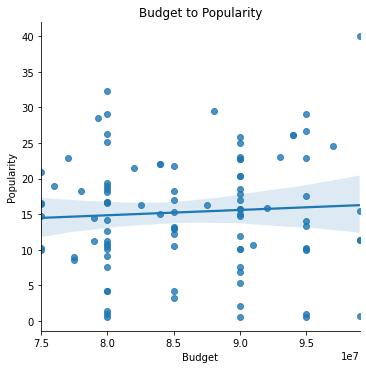

In [30]:
sns.lmplot(x='production_budget', y='popularity', data=pop_budg_sort)
plt.title('Budget to Popularity')
plt.xlabel("Budget")
plt.ylabel("Popularity");

There appears to be no relationship between a movies production budget under 100 million and popularity. 

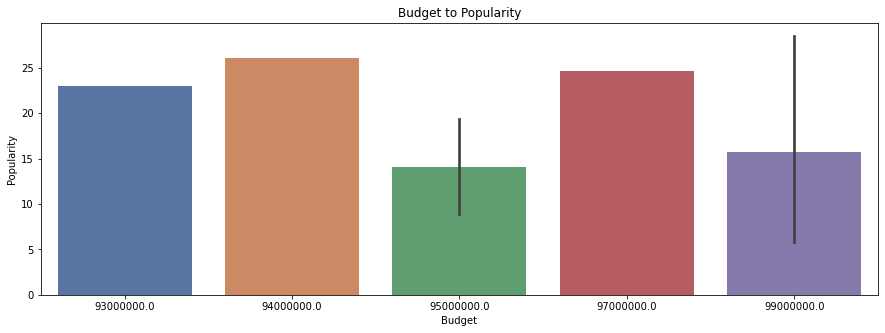

In [31]:
plt.figure(figsize=(15,5))
plt.title("Budget to Popularity")
sns.barplot(palette="deep", x=pop_budg_sort['production_budget'][:20], y=pop_budg_sort['popularity']);
plt.xlabel("Budget")
plt.ylabel("Popularity");

Looking at the top 20, as expected from the correlation above, production budget appears to have no effect on popularity. 

# Budget to Profit

In [32]:
csv_files_dict['bom_movie_gross_gz'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           3387 non-null   int64  
 1   title           3387 non-null   object 
 2   studio          3382 non-null   object 
 3   domestic_gross  3359 non-null   float64
 4   foreign_gross   2037 non-null   object 
 5   year            3387 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 158.9+ KB


In [33]:
gross = csv_files_dict['bom_movie_gross_gz']

In [34]:
gross['foreign_gross']= gross['foreign_gross'].str.replace(",", "")
gross['foreign_gross']= gross['foreign_gross'].str.replace("$", "")

<ipython-input-34-73b018ec9365>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  gross['foreign_gross']= gross['foreign_gross'].str.replace("$", "")


In [35]:
gross['foreign_gross'] = gross['foreign_gross'].astype(float)

In [36]:
gross['worldwide_gross'] = gross['domestic_gross'] + gross['foreign_gross']
gross['worldwide_gross']

0       1.067000e+09
1       1.025500e+09
2       9.603000e+08
3       8.283000e+08
4       7.526000e+08
            ...     
3382             NaN
3383             NaN
3384             NaN
3385             NaN
3386             NaN
Name: worldwide_gross, Length: 3387, dtype: float64

In [37]:
gross.dropna(subset=['worldwide_gross'], inplace=True)
gross['worldwide_gross']

0       1.067000e+09
1       1.025500e+09
2       9.603000e+08
3       8.283000e+08
4       7.526000e+08
            ...     
3275    1.501400e+06
3286    9.540000e+05
3309    2.660000e+05
3342    9.840000e+04
3353    7.320000e+04
Name: worldwide_gross, Length: 2009, dtype: float64

In [38]:
gross_budget = pd.merge(gross, budgets_lt_100mil, left_on='index', right_on='index', how='left')
gross_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              2009 non-null   int64  
 1   title              2009 non-null   object 
 2   studio             2007 non-null   object 
 3   domestic_gross_x   2009 non-null   float64
 4   foreign_gross      2009 non-null   float64
 5   year               2009 non-null   int64  
 6   worldwide_gross_x  2009 non-null   float64
 7   id                 1622 non-null   float64
 8   release_date       1622 non-null   object 
 9   movie              1622 non-null   object 
 10  production_budget  1622 non-null   float64
 11  domestic_gross_y   1622 non-null   object 
 12  worldwide_gross_y  1622 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 219.7+ KB


In [39]:
gross_budget.drop(columns=[
    'studio',
    'index', 
    'domestic_gross_x', 
    'domestic_gross_y',
    'foreign_gross',  
    'year',
    'release_date',
    'movie',
    'id',
    'worldwide_gross_y',
    'title'
], 
                 inplace=True)

In [40]:
gross_budget['worldwide_gross'] = gross_budget['worldwide_gross_x']

In [41]:
gross_budget.drop(columns=['worldwide_gross_x'])

,production_budget,worldwide_gross
0,NaN,1.067000e+09
1,NaN,1.025500e+09
2,NaN,9.603000e+08
3,NaN,8.283000e+08
4,NaN,7.526000e+08
...,...,...
2004,13000000.0,1.501400e+06
2005,13000000.0,9.540000e+05
2006,13000000.0,2.660000e+05
2007,12000000.0,9.840000e+04


In [42]:
gross_budget['worldwide_profit'] = gross_budget['worldwide_gross']-gross_budget['production_budget']

In [43]:
gross_budget['profit_percentage']= (gross_budget['worldwide_profit']/ gross_budget['production_budget'])*100
gross_budget['profit_percentage']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2004   -88.450769
2005   -92.661538
2006   -97.953846
2007   -99.180000
2008   -99.390000
Name: profit_percentage, Length: 2009, dtype: float64

In [44]:
gross_budget = gross_budget.dropna(subset=['profit_percentage'])
gross_budget

,worldwide_gross_x,production_budget,worldwide_gross,worldwide_profit,profit_percentage
387,84900000.0,99000000.0,84900000.0,-14100000.0,-14.242424
388,83200000.0,99000000.0,83200000.0,-15800000.0,-15.959596
389,82700000.0,99000000.0,82700000.0,-16300000.0,-16.464646
390,82100000.0,98000000.0,82100000.0,-15900000.0,-16.224490
391,80600000.0,97000000.0,80600000.0,-16400000.0,-16.907216
...,...,...,...,...,...
2004,1501400.0,13000000.0,1501400.0,-11498600.0,-88.450769
2005,954000.0,13000000.0,954000.0,-12046000.0,-92.661538
2006,266000.0,13000000.0,266000.0,-12734000.0,-97.953846
2007,98400.0,12000000.0,98400.0,-11901600.0,-99.180000


In [45]:
gross_budget_sort = gross_budget.sort_values(by='profit_percentage', ascending=False)
gross_budget_sort

,worldwide_gross_x,production_budget,worldwide_gross,worldwide_profit,profit_percentage
1837,1.347000e+09,15000000.0,1.347000e+09,1.332000e+09,8880.000000
1838,1.309500e+09,15000000.0,1.309500e+09,1.294500e+09,8630.000000
1839,1.242800e+09,15000000.0,1.242800e+09,1.227800e+09,8185.333333
1840,1.147800e+09,15000000.0,1.147800e+09,1.132800e+09,7552.000000
1659,1.332600e+09,18500000.0,1.332600e+09,1.314100e+09,7103.243243
...,...,...,...,...,...
596,3.240000e+04,70000000.0,3.240000e+04,-6.996760e+07,-99.953714
597,2.190000e+04,70000000.0,2.190000e+04,-6.997810e+07,-99.968714
842,1.300000e+04,50000000.0,1.300000e+04,-4.998700e+07,-99.974000
598,1.080000e+04,70000000.0,1.080000e+04,-6.998920e+07,-99.984571


In [46]:
gross_budget_sort['profit_percentage'] = round(gross_budget_sort['profit_percentage'], 2)

In [47]:
gross_budget[['profit_percentage', 'production_budget']].corr()

,profit_percentage,production_budget
profit_percentage,1.000000,-0.298881
production_budget,-0.298881,1.000000


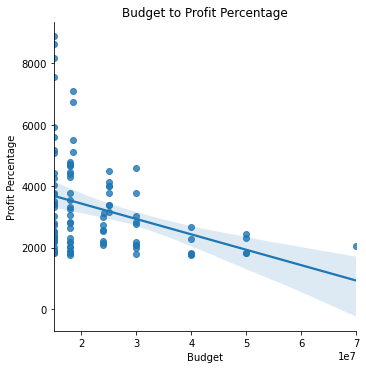

In [48]:
sns.lmplot(x='production_budget', y='profit_percentage', data=gross_budget_sort[:100]);
plt.title('Budget to Profit Percentage')
plt.xlabel("Budget")
plt.ylabel("Profit Percentage");

There appears to be no relationship, maybe even a weak negative trend, between a movies production budget under 100 million and profit percentage. 

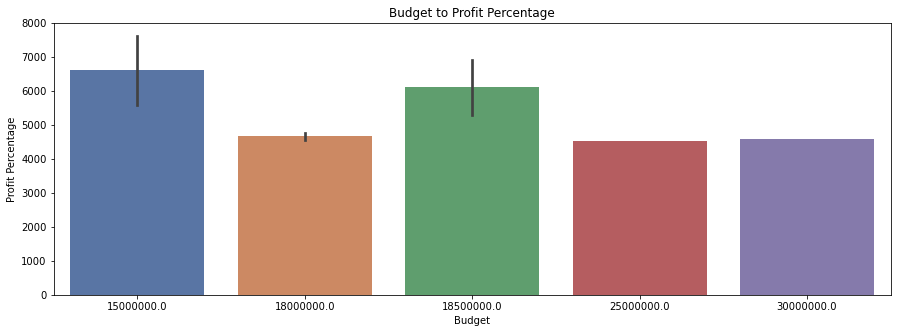

In [49]:
plt.figure(figsize=(15,5))
plt.title("Budget to Profit Percentage")
sns.barplot(palette= "deep", x='production_budget', y='profit_percentage', data=gross_budget_sort[:20]);
plt.xlabel("Budget")
plt.ylabel("Profit Percentage");

Looking at the top 20, as expected from the correlation above, production budget appears to have no effect on profit percentage. 

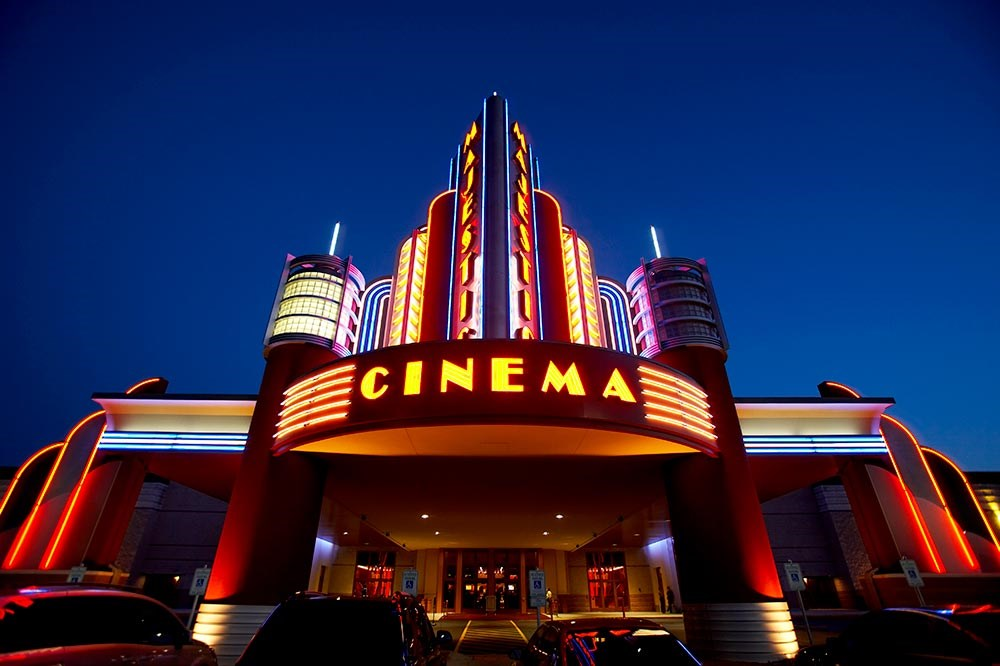

# Conclusion

Looking into budgets under 100 million dollars, it has no effect or relation to average rating, popularity, and profit.
 - Budget has no relation to a movies average rating. The budget has no determination if a movie will be rated well or not.
 - Budget is not related to popularity. Budget will not determine a movie's popularity.
 - Budget is not related to a profit percentage increase. Budget does not exclusively determine a movie's profit percentage.


## Next Steps

Though budget showed no relation or effect on the subjects analyzed. Further analysis on budget could show its value to predicting a successful movie.
 - Analyze other variables relation to average rating, popularity, and profit.
 - Determine other possible variables as indicators for a successful movie
 - Look into what might affect a budget, like averaging a studio's budgets, along with average rating, popularity, and profit
